<a href="https://colab.research.google.com/github/AbbySnt/EstadisticaAplicada_1990002/blob/main/sesion13_g44_28sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadistica aplicada
sesion12 - 26 sept

Yessica Abigail Santiago Hernandez 1990002

Gpo 44

In [46]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
#librerias especializadas
import yfinance as yf
#definimos el tamaño de la grafica
plt.rcParams['figure.figsize']=(10,6)

In [48]:
#datos de walmex
walmex = yf.download('WALMEX.MX',
                     start = '2016-01-01',
                     end = '2022-12-31',
                     progress =False)

In [49]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479042,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329960,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098072,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118732,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980030,15949791


In [50]:
walmex = walmex[['Adj Close']]

In [51]:
walmex.head()

,Adj Close
Date,
2016-01-04,35.479042
2016-01-05,35.329960
2016-01-06,35.098072
2016-01-07,33.118732
2016-01-08,33.980030


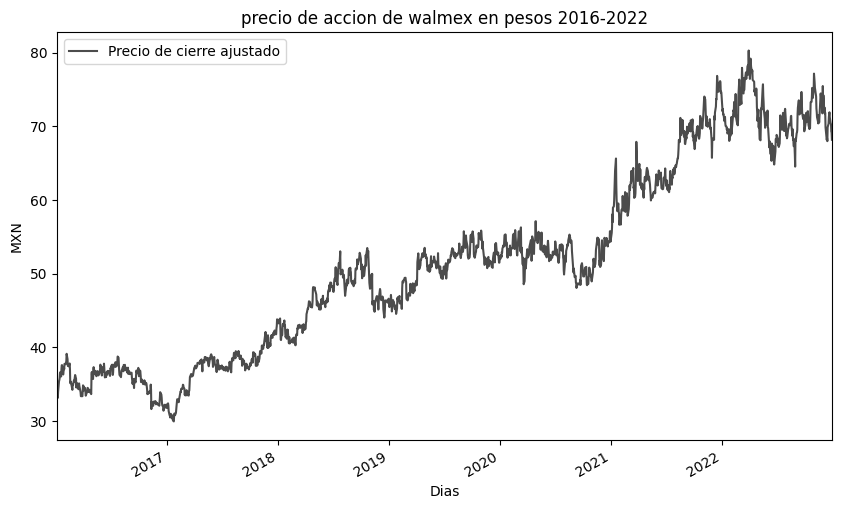

In [52]:
#grafica
walmex=walmex.rename(columns ={'Adj Close':'Precio de cierre ajustado'})
walmex.plot(color = 'black', alpha =0.7) #alpha es para dar transparencia 1=no tranparente 0=completamente transparente
plt.title('precio de accion de walmex en pesos 2016-2022')
plt.xlabel('Dias')
plt.ylabel('MXN')
plt.xlim('2016-01-04','2022-12-30');



In [53]:
#calcular señal corto y largo plazo

##señal corto
walmex['PMS-10'] = walmex['Precio de cierre ajustado'].rolling(10).mean()

##señal largo
walmex['PMS-50'] = walmex['Precio de cierre ajustado'].rolling(50).mean()

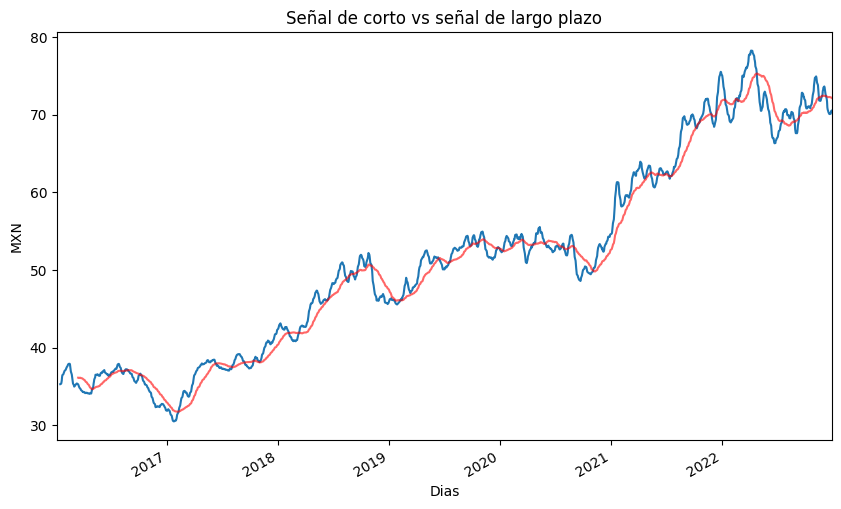

In [54]:
walmex['PMS-10'].plot()
walmex['PMS-50'].plot(color = 'red',alpha = 0.6)
plt.title('Señal de corto vs señal de largo plazo')
plt.xlabel('Dias')
plt.ylabel('MXN')
plt.xlim('2016-01-04','2022-12-30');




In [55]:
walmex['decision'] = walmex['PMS-10']>walmex['PMS-50']

In [56]:
walmex['decision1'] = np.where(walmex['decision']==True,'coprar/mantener','vender/no comprar')

In [59]:
walmex.head()

,Precio de cierre ajustado,PMS-10,PMS-50,decision,decision1,retorno
Date,,,,,,
2016-01-04,35.479042,NaN,NaN,False,vender/no comprar,NaN
2016-01-05,35.329960,NaN,NaN,False,vender/no comprar,-0.004202
2016-01-06,35.098072,NaN,NaN,False,vender/no comprar,-0.006563
2016-01-07,33.118732,NaN,NaN,False,vender/no comprar,-0.056395
2016-01-08,33.980030,NaN,NaN,False,vender/no comprar,0.026006


pct_change= $\frac{P_t-P_{t-1}}{P_{t-1}}$

In [57]:
#pct.change()
walmex['retorno'] =walmex['Precio de cierre ajustado'].pct_change()

In [58]:
walmex[['Precio de cierre ajustado','retorno']]

,Precio de cierre ajustado,retorno
Date,,
2016-01-04,35.479042,NaN
2016-01-05,35.329960,-0.004202
2016-01-06,35.098072,-0.006563
2016-01-07,33.118732,-0.056395
2016-01-08,33.980030,0.026006
...,...,...
2022-12-26,70.354919,-0.012226
2022-12-27,70.285660,-0.000984
2022-12-28,69.266449,-0.014501
